In [28]:
import hist
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [29]:
geometries = ['current-geometry', 'iRPC-added-geometry', 'target-geometry']
sample_types = ['2025-mu-pt10']
data = []
for geometry in geometries:
    sample = uproot.open(f"output/{sample_types[0]}-{geometry}.root:muonAnalyzer/MuonTree").arrays(library="np")
    flat_sample = {key: np.concatenate(sample[key]) for key in sample.keys()}
    data.append(flat_sample)

In [30]:
h_sim_eta_list = []
h_reco_eta_list = []
h_sa_eta_list = []  
h_gb_eta_list = []

for sample in data:
    sim_eta = sample['simMuon_eta']
    reco_eta = sample['recoMuon_eta']
    is_standalone = sample['recoMuon_isStandalone']
    is_global = sample['recoMuon_isGlobal']
    sa_eta = reco_eta[is_standalone]
    gb_eta = reco_eta[is_global]

    h_sim_eta = hist.Hist.new.Regular(100, -2.5, 2.5).Weight()
    h_reco_eta = hist.Hist.new.Regular(100, -2.5, 2.5).Weight()
    h_sa_eta = hist.Hist.new.Regular(100, -2.5, 2.5).Weight()
    h_gb_eta = hist.Hist.new.Regular(100, -2.5, 2.5).Weight()

    h_sim_eta.fill(sim_eta)
    h_reco_eta.fill(reco_eta)
    h_sa_eta.fill(sa_eta)
    h_gb_eta.fill(gb_eta)
    
    h_sim_eta_list.append(h_sim_eta)
    h_reco_eta_list.append(h_reco_eta)
    h_sa_eta_list.append(h_sa_eta)
    h_gb_eta_list.append(h_gb_eta)

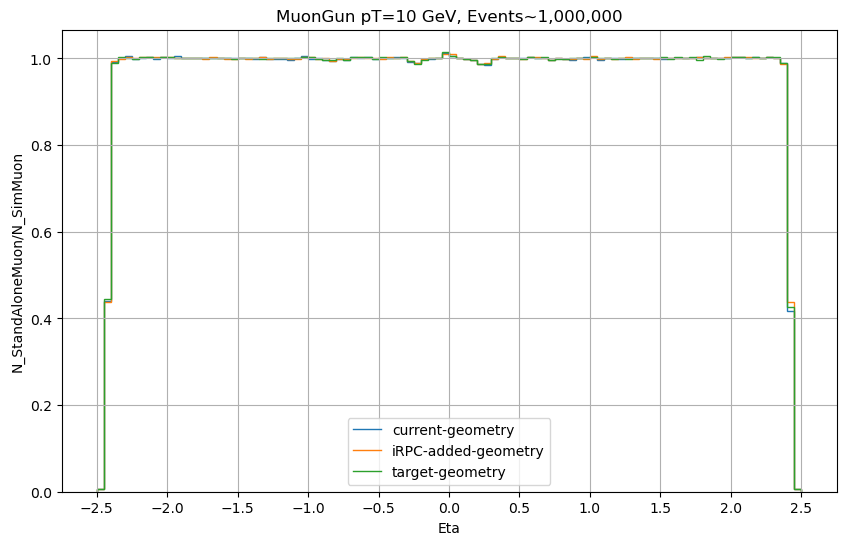

In [31]:
plt.figure(figsize=(10, 6))
bin_edges = h_sim_eta_list[0].axes[0].edges

for i in range(len(h_sim_eta_list)):
    ratio = h_sa_eta_list[i].values() / h_sim_eta_list[i].values()
    plt.stairs(ratio, bin_edges, label=f'{geometries[i]}')

#ratio = h_gb_eta_list[0].values() / h_sim_eta_list[0].values()
#plt.stairs(ratio, bin_edges, label='Reco/Sim Ratio')
plt.xlabel('Eta')
plt.xticks(np.linspace(-2.5, 2.5, 11))

plt.ylabel('N_StandAloneMuon/N_SimMuon')
#plt.ylim(0.8, 1.1)

plt.title('MuonGun pT=10 GeV, Events~1,000,000')
plt.legend()
plt.grid(True)
plt.show()